# **Часть 1: Нормализация данных (1 пара)**

1. Подготовка данных:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
# Подготовка данных
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


2. Применение методов нормализации:

In [ ]:
# Создание и обучение модели без нормализации
def create_base_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

base_model = create_base_model()
base_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
base_history = base_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=1)
base_time = time.time() - start_time

base_test_loss, base_test_acc = base_model.evaluate(x_test, y_test, verbose=0)
base_train_loss, base_train_acc = base_model.evaluate(x_train, y_train, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3348 - loss: 1.8238 - val_accuracy: 0.4997 - val_loss: 1.4234
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5384 - loss: 1.3050 - val_accuracy: 0.5850 - val_loss: 1.1749
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5959 - loss: 1.1551 - val_accuracy: 0.6192 - val_loss: 1.0837
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6332 - loss: 1.0572 - val_accuracy: 0.6441 - val_loss: 1.0269
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6615 - loss: 0.9691 - val_accuracy: 0.6605 - val_loss: 0.9805
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6752 - loss: 0.9324 - val_accuracy: 0.6698 - val_loss: 0.9567
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6916 - loss: 0.8833 - val_accuracy: 0.6544 - val_loss: 0.9868
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7119 - loss: 0.8326 - val_accuracy: 0

In [ ]:
# Создание и обучение модели с Batch Normalization
def create_batchnorm_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    return model

batchnorm_model = create_batchnorm_model()
batchnorm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
batchnorm_history = batchnorm_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=1)
batchnorm_time = time.time() - start_time

batchnorm_test_loss, batchnorm_test_acc = batchnorm_model.evaluate(x_test, y_test, verbose=0)
batchnorm_train_loss, batchnorm_train_acc = batchnorm_model.evaluate(x_train, y_train, verbose=0)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4641 - loss: 1.5458 - val_accuracy: 0.2611 - val_loss: 2.2609
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6681 - loss: 0.9436 - val_accuracy: 0.5549 - val_loss: 1.3462
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7326 - loss: 0.7836 - val_accuracy: 0.5829 - val_loss: 1.2588
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7742 - loss: 0.6607 - val_accuracy: 0.5982 - val_loss: 1.2326
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8085 - loss: 0.5632 - val_accuracy: 0.6999 - val_loss: 0.8820
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8424 - loss: 0.4762 - val_accuracy: 0.6607 - val_loss: 1.0859
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8609 - loss: 0.4149 - val_accuracy: 0.6630 - val_loss: 1.0854
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8844 - loss: 0.3479 - val_accuracy: 0

In [ ]:
# Создание и обучение модели с Layer Normalization
def create_layernorm_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(LayerNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(LayerNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(LayerNormalization())
    model.add(Dense(10, activation='softmax'))
    return model

layernorm_model = create_layernorm_model()
layernorm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
layernorm_history = layernorm_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=1)
layernorm_time = time.time() - start_time

layernorm_test_loss, layernorm_test_acc = layernorm_model.evaluate(x_test, y_test, verbose=0)
layernorm_train_loss, layernorm_train_acc = layernorm_model.evaluate(x_train, y_train, verbose=0)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3471 - loss: 1.8300 - val_accuracy: 0.5743 - val_loss: 1.1947
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6181 - loss: 1.0861 - val_accuracy: 0.6573 - val_loss: 0.9965
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6874 - loss: 0.8993 - val_accuracy: 0.6756 - val_loss: 0.9401
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7287 - loss: 0.7889 - val_accuracy: 0.6769 - val_loss: 0.9240
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7600 - loss: 0.6922 - val_accuracy: 0.6684 - val_loss: 0.9774
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7916 - loss: 0.6051 - val_accuracy: 0.7070 - val_loss: 0.8781
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8146 - loss: 0.5353 - val_accuracy: 0.7015 - val_loss: 0.9230
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8467 - loss: 0.4553 - val_accuracy: 

In [ ]:
# Создание и обучение модели с Dropout
def create_dropout_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

dropout_model = create_dropout_model()
dropout_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
dropout_history = dropout_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=1)
dropout_time = time.time() - start_time

dropout_test_loss, dropout_test_acc = dropout_model.evaluate(x_test, y_test, verbose=0)
dropout_train_loss, dropout_train_acc = dropout_model.evaluate(x_train, y_train, verbose=0)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2308 - loss: 2.0649 - val_accuracy: 0.4711 - val_loss: 1.5202
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4069 - loss: 1.6229 - val_accuracy: 0.5106 - val_loss: 1.4077
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4595 - loss: 1.4961 - val_accuracy: 0.5665 - val_loss: 1.2511
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4943 - loss: 1.4073 - val_accuracy: 0.5924 - val_loss: 1.1931
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5210 - loss: 1.3420 - val_accuracy: 0.6131 - val_loss: 1.1213
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5384 - loss: 1.3058 - val_accuracy: 0.6197 - val_loss: 1.0997
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5499 - loss: 1.2641 - val_accuracy: 0.6338 - val_loss: 1.0709
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5621 - loss: 1.2387 - val_accuracy: 

3. Визуализация

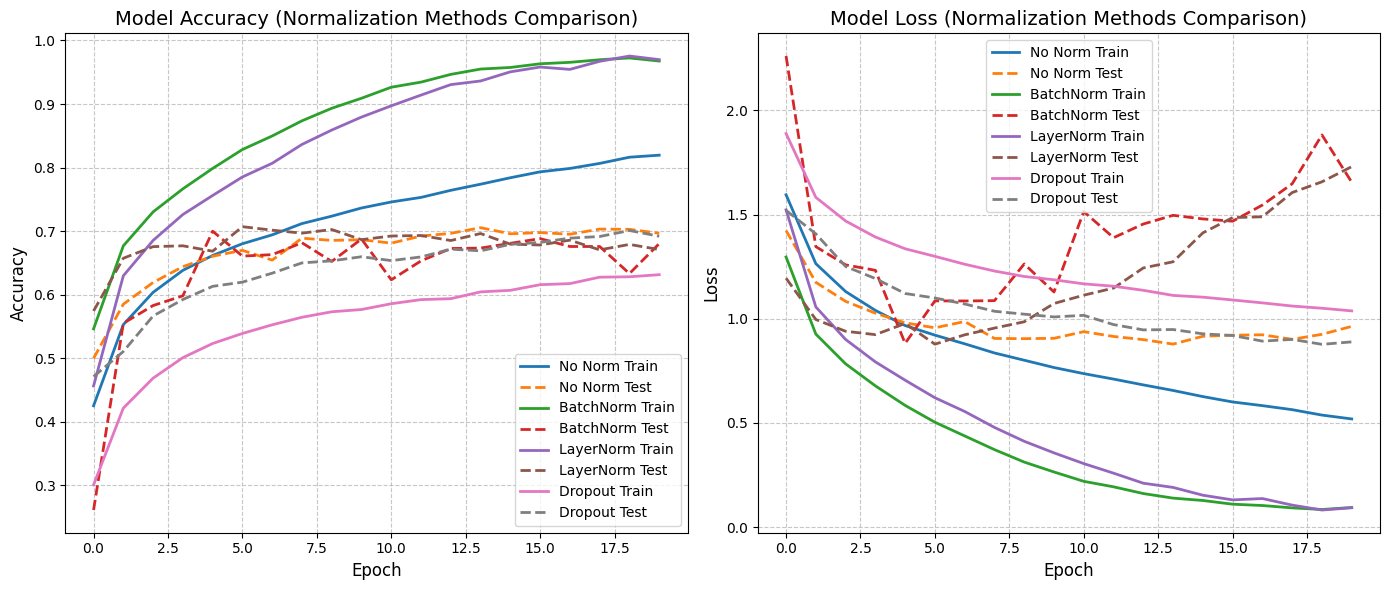

In [ ]:
def plot_training_results(histories, title_suffix=""):
    plt.figure(figsize=(14, 6))

    # График точности
    plt.subplot(1, 2, 1)
    for name, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{name} Train', linewidth=2)
        plt.plot(history.history['val_accuracy'], '--', label=f'{name} Test', linewidth=2)
    plt.title(f'Model Accuracy {title_suffix}', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

    # График потерь
    plt.subplot(1, 2, 2)
    for name, history in histories.items():
        plt.plot(history.history['loss'], label=f'{name} Train', linewidth=2)
        plt.plot(history.history['val_loss'], '--', label=f'{name} Test', linewidth=2)
    plt.title(f'Model Loss {title_suffix}', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

norm_histories = {
    'No Norm': base_history,
    'BatchNorm': batchnorm_history,
    'LayerNorm': layernorm_history,
    'Dropout': dropout_history
}
plot_training_results(norm_histories, "(Normalization Methods Comparison)")

In [ ]:
import pandas as pd

results = pd.DataFrame({
    'Method': ['No Normalization', 'Batch Norm', 'Layer Norm', 'Dropout'],
    'Test Accuracy': [base_test_acc, batchnorm_test_acc, layernorm_test_acc, dropout_test_acc],
    'Test Loss': [base_test_loss, batchnorm_test_loss, layernorm_test_loss, dropout_test_loss],
    'Training Time': [base_time, batchnorm_time, layernorm_time, dropout_time],
    'Overfitting': [
        base_train_acc - base_test_acc,
        batchnorm_train_acc - batchnorm_test_acc,
        layernorm_train_acc - layernorm_test_acc,
        dropout_train_acc - dropout_test_acc
    ]
})
print("Результаты экспериментов с нормализацией:")
results

Результаты экспериментов с нормализацией:


,Method,Test Accuracy,Test Loss,Training Time,Overfitting
0,No Normalization,0.6966,0.9636,56.1386,0.1387
1,Batch Norm,0.6803,1.6553,58.5326,0.2731
2,Layer Norm,0.6710,1.7300,63.9121,0.3013
3,Dropout,0.6919,0.8892,55.7668,0.0505


# **Часть 2: Исследование различных архитектур нейронных сетей (1 пара)**

Обучение ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2

# Создание и обучение ResNet50
def create_resnet():
    model = ResNet50(weights=None, include_top=True, input_shape=(32, 32, 3), classes=10)
    return model

resnet_model = create_resnet()
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
resnet_history = resnet_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=1)
resnet_time = time.time() - start_time

resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test, y_test, verbose=0)
resnet_train_loss, resnet_train_acc = resnet_model.evaluate(x_train, y_train, verbose=0)
resnet_params = resnet_model.count_params() / 1e6

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 114ms/step - accuracy: 0.3137 - loss: 2.3295 - val_accuracy: 0.1763 - val_loss: 3.0548
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.4913 - loss: 1.5435 - val_accuracy: 0.1000 - val_loss: 1275.2600
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.3875 - loss: 1.8037 - val_accuracy: 0.2483 - val_loss: 2.0741
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.4168 - loss: 1.6910 - val_accuracy: 0.3800 - val_loss: 1.9317
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.5228 - loss: 1.4025 - val_accuracy: 0.4197 - val_loss: 1.9760
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.4993 - loss: 1.5274 - val_accuracy: 0.2417 - val_loss: 2.9364
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.5374 - loss: 1.3394 - val_accuracy: 0.4458 - val_loss: 1.6829
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.5756 - loss: 1.213

Обучение VGG

In [ ]:
# Создание и обучение VGG16
def create_vgg():
    model = VGG16(weights=None, include_top=True, input_shape=(32, 32, 3), classes=10)
    return model

vgg_model = create_vgg()
vgg_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
vgg_history = vgg_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=1)
vgg_time = time.time() - start_time

vgg_test_loss, vgg_test_acc = vgg_model.evaluate(x_test, y_test, verbose=0)
vgg_train_loss, vgg_train_acc = vgg_model.evaluate(x_train, y_train, verbose=0)
vgg_params = vgg_model.count_params() / 1e6

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.0991 - loss: 2.3037 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.0969 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.0966 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.0971 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.0969 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.1029 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.1010 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.0993 - loss: 2.3026 - 

Обучение MobileNet

In [ ]:
# Создание и обучение MobileNetV2
def create_mobilenet():
    model = MobileNetV2(weights=None, include_top=True, input_shape=(32, 32, 3), classes=10)
    return model

mobilenet_model = create_mobilenet()
mobilenet_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
mobilenet_history = mobilenet_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=1)
mobilenet_time = time.time() - start_time

mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(x_test, y_test, verbose=0)
mobilenet_train_loss, mobilenet_train_acc = mobilenet_model.evaluate(x_train, y_train, verbose=0)
mobilenet_params = mobilenet_model.count_params() / 1e6

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.2196 - loss: 2.1929 - val_accuracy: 0.1000 - val_loss: 2.3166
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4183 - loss: 1.5640 - val_accuracy: 0.1000 - val_loss: 2.3689
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5109 - loss: 1.3546 - val_accuracy: 0.1000 - val_loss: 2.3892
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5474 - loss: 1.2496 - val_accuracy: 0.1000 - val_loss: 2.4916
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5772 - loss: 1.1871 - val_accuracy: 0.1000 - val_loss: 2.4093
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6180 - loss: 1.0755 - val_accuracy: 0.1000 - val_loss: 2.4012
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6189 - loss: 1.0894 - val_accuracy: 0.1000 - val_loss: 2.5143
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6557 - loss: 0.9650 - val_a

Сравнительный анализ:

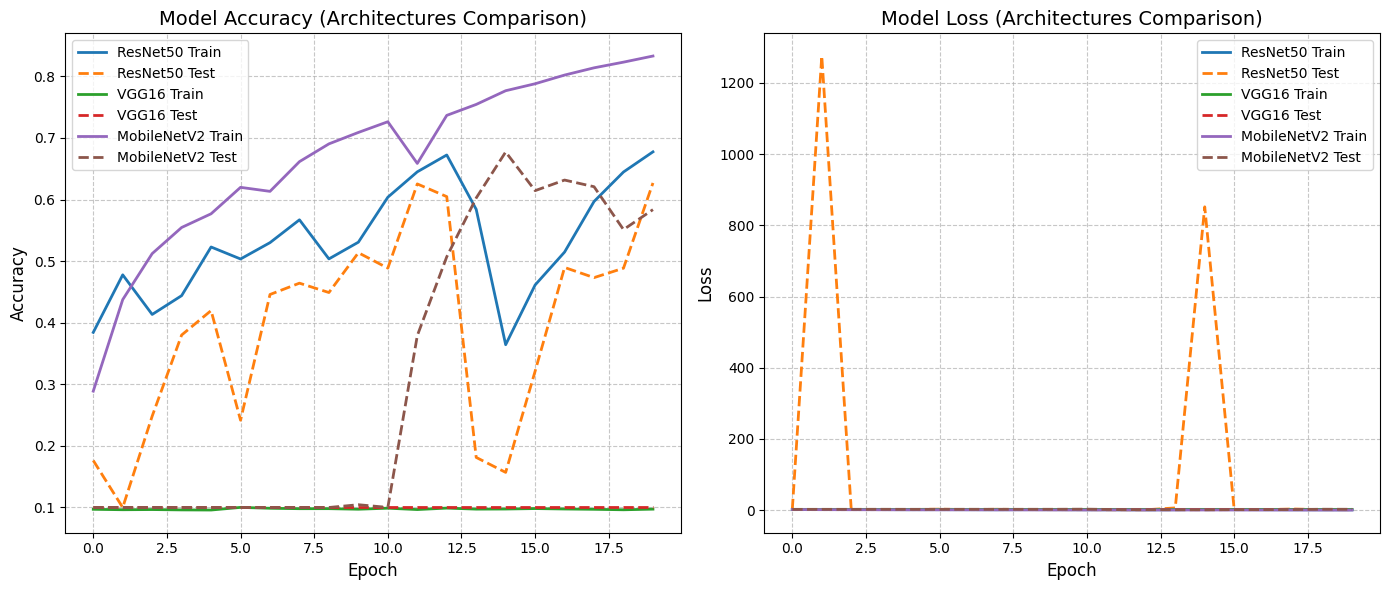

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Графики для сравнения архитектур
arch_histories = {
    'ResNet50': resnet_history,
    'VGG16': vgg_history,
    'MobileNetV2': mobilenet_history
}
plot_training_results(arch_histories, "(Architectures Comparison)")

In [ ]:
import pandas as pd

arch_results = pd.DataFrame({
    'Architecture': ['ResNet50', 'VGG16', 'MobileNetV2'],
    'Test Accuracy': [resnet_test_acc, vgg_test_acc, mobilenet_test_acc],
    'Parameters (M)': [resnet_params, vgg_params, mobilenet_params],
    'Training Time': [resnet_time, vgg_time, mobilenet_time],
    'Overfitting': [
        resnet_train_acc - resnet_test_acc,
        vgg_train_acc - vgg_test_acc,
        mobilenet_train_acc - mobilenet_test_acc
    ],
    'Test Loss': [resnet_test_loss, vgg_test_loss, mobilenet_test_loss]
})
print("Сравнение архитектур:")
arch_results

Сравнение архитектур:


,Architecture,Test Accuracy,Parameters (M),Training Time,Overfitting,Test Loss
0,ResNet50,0.6269,23.6082,836.3991,0.0358,1.2275
1,VGG16,0.1000,33.6382,770.6331,0.0000,2.3026
2,MobileNetV2,0.5836,2.2708,245.7656,0.0753,2.5278
